In [1]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 
import seaborn as sns
import sklearn

In [5]:
import matplotlib.dates as mdates

In [2]:
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [3]:
df=pd.read_csv('project_files/analytical_table.csv')

In [9]:
# df.listdate.unique

<bound method Series.unique of 0       2020-07-18 00:00:00
1       2020-07-18 00:00:00
2       2020-07-18 00:00:00
3       2020-07-18 00:00:00
4       2020-07-18 00:00:00
               ...         
6913    2022-06-16 11:55:28
6914    2022-06-16 12:21:02
6915    2022-06-16 12:23:53
6916    2022-06-16 13:08:35
6917    2022-06-16 14:54:29
Name: listdate, Length: 6918, dtype: object>

In [4]:
df.dtypes

id                                    int64
price                               float64
bedrooms                              int64
bathrooms                             int64
toilets                             float64
furnished                             int64
serviced                              int64
shared                                int64
parking                               int64
listdate                             object
pre_covid                             int64
category_For Rent                     int64
category_For Sale                     int64
type_Apartment                        int64
type_House                            int64
sub_type_Bedsitter (Single Room)      int64
sub_type_Block of Flats               int64
sub_type_Detached Bungalow            int64
sub_type_Detached Duplex              int64
sub_type_Mini Flat                    int64
sub_type_Missing                      int64
sub_type_Semi-detached Bungalow       int64
sub_type_Semi-detached Duplex   

In [5]:
df['listdate']= pd.to_datetime(df['listdate'])

In [6]:
df.dtypes

id                                           int64
price                                      float64
bedrooms                                     int64
bathrooms                                    int64
toilets                                    float64
furnished                                    int64
serviced                                     int64
shared                                       int64
parking                                      int64
listdate                            datetime64[ns]
pre_covid                                    int64
category_For Rent                            int64
category_For Sale                            int64
type_Apartment                               int64
type_House                                   int64
sub_type_Bedsitter (Single Room)             int64
sub_type_Block of Flats                      int64
sub_type_Detached Bungalow                   int64
sub_type_Detached Duplex                     int64
sub_type_Mini Flat             

In [7]:
#split the dataset
from sklearn.model_selection import train_test_split

In [8]:
import matplotlib.dates as mdates

In [9]:
df=df.drop('listdate',axis=1)

In [10]:
#object for target variable
y = df.price

#  input features object
X = df.drop('price', axis = 1)

In [83]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2,\
                                                    random_state = 376)

In [84]:
print( len(X_train), len(X_test), len(y_train), len(y_test) )

4612 2306 4612 2306


In [85]:
X_train.describe()

,id,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,pre_covid,category_For Rent,...,locality_Nairobi Central,locality_Nairobi West,locality_Ngong,locality_Nyali,locality_Ongata Rongai,locality_Parklands,locality_Ruiru,locality_Thika,locality_Westlands,two_and_two
count,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,...,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000
mean,8841.350173,3.097788,3.001951,1.824805,0.057892,0.064614,0.007589,1.326973,0.371422,0.516696,...,0.024284,0.020815,0.038595,0.070252,0.026886,0.042064,0.048135,0.024284,0.198179,0.188422
std,4690.276695,1.711893,1.749368,1.960046,0.233565,0.245870,0.086793,1.508231,0.483237,0.499775,...,0.153948,0.142781,0.192649,0.255598,0.161769,0.200757,0.214075,0.153948,0.398671,0.391091
min,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5648.500000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9650.500000,3.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12646.250000,4.000000,4.000000,3.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16123.000000,50.000000,54.000000,33.000000,1.000000,1.000000,1.000000,22.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
# Standardize X_train
X_train_new = (X_train - X_train.mean())/X_train.std()

In [87]:
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

In [88]:
# For standardization
from sklearn.preprocessing import StandardScaler

In [89]:
# Create pipelines dictionary
pipelines =  {
            'lasso': make_pipeline(StandardScaler(), Lasso(random_state=192)),
            'ridge': make_pipeline(StandardScaler(), Ridge(random_state=192)),
            'enet': make_pipeline(StandardScaler(), ElasticNet(random_state=192)),
            'rf': make_pipeline(StandardScaler(), RandomForestRegressor(random_state=192)),
            'gb': make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=192))
                }

In [90]:
for key, value in pipelines.items():
    print( key, type(value) )

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


In [91]:
# List tuneable hyperparameters of our Lasso pipeline
pipelines['lasso'].get_params()

{'memory': None,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('lasso',
   Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
         normalize=False, positive=False, precompute=False, random_state=192,
         selection='cyclic', tol=0.0001, warm_start=False))],
 'verbose': False,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'lasso': Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
       normalize=False, positive=False, precompute=False, random_state=192,
       selection='cyclic', tol=0.0001, warm_start=False),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'lasso__alpha': 1.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__normalize': False,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': 192,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.

In [92]:
# Lasso hyperparameters
lasso_hyperparameters = {'lasso__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] }

# Ridge hyperparameters
ridge_hyperparameters = {'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] }

In [93]:
# Elastic Net hyperparameters
enet_hyperparameters = {
    'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
    'elasticnet__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

In [94]:
# Random forest hyperparameters
rf_hyperparameters  = {
    'randomforestregressor__n_estimators': [100,200],
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33]
}

In [95]:
gb_hyperparameters = {
            'gradientboostingregressor__n_estimators' : [100,200],
            'gradientboostingregressor__learning_rate': [0.05, 0.1,0.2],
            'gradientboostingregressor__max_depth': [1,3,5]
}

In [96]:
# Create hyperparameters dictionary
hyperparameters = {
    'rf': rf_hyperparameters,
    'gb': gb_hyperparameters,
    'lasso': lasso_hyperparameters,
    'ridge': ridge_hyperparameters,
    'enet': enet_hyperparameters
}

In [97]:
for key in ['enet', 'gb', 'ridge', 'rf', 'lasso']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')


enet was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.


In [98]:
#helper for cross validation
from sklearn.model_selection import GridSearchCV

In [99]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv = 10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

C:\Users\ianok\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3188391122359296e+16, tolerance: 170677800558513.53
  positive)


lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [100]:
# Check that we have 5 cross-validation objects
for key, value in fitted_models.items():
    print( key, type(value) )

lasso <class 'sklearn.model_selection._search.GridSearchCV'>
ridge <class 'sklearn.model_selection._search.GridSearchCV'>
enet <class 'sklearn.model_selection._search.GridSearchCV'>
rf <class 'sklearn.model_selection._search.GridSearchCV'>
gb <class 'sklearn.model_selection._search.GridSearchCV'>


In [101]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [102]:
# Display best_score_ for each fitted model
for name, model in fitted_models.items():
    print(name, model.best_score_)

lasso 0.5791322554834939
ridge 0.579192503988575
enet 0.5795478421581622
rf 0.8196943673467706
gb 0.8316034887652071


In [73]:
# Import r2_score and mean_absolute_error functions
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
	

In [77]:
# Code here
for name, model in fitted_models.items():
    print(name)
    print('--------')
    pred = model.predict(X_test)
    print('R^2:', r2_score(y_test, pred))
    print('MSE:', mean_squared_error(y_test, pred))
    print('MAE: ', mean_absolute_error(y_test, pred))
    print('\n')

lasso
--------
R^2: 0.5954183208275001
MSE: 166910741458402.62
MAE:  8960768.43865641


ridge
--------
R^2: 0.5953817527033554
MSE: 166925827689512.34
MAE:  8956047.089761192


enet
--------
R^2: 0.5943647156422461
MSE: 167345407761224.0
MAE:  8877089.282678992


rf
--------
R^2: 0.842845549745634
MSE: 64834289751068.99
MAE:  3492953.8774895635


gb
--------
R^2: 0.8317933210473274
MSE: 69393902263863.125
MAE:  3908050.4372006524




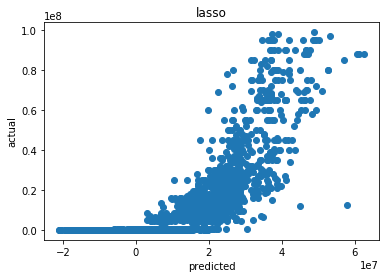

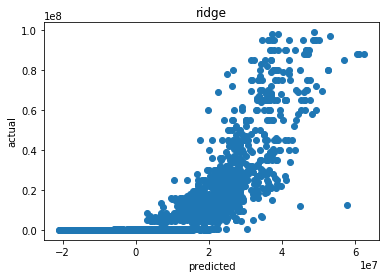

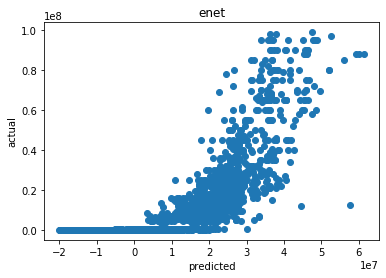

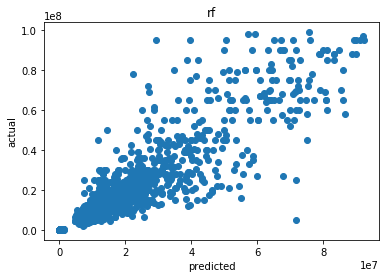

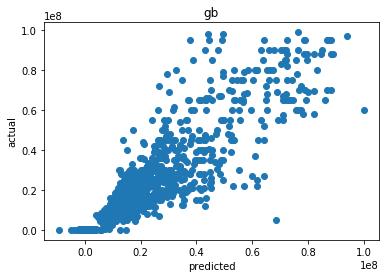

In [103]:
# Code here
for name, model in fitted_models.items():
    pred = fitted_models[name].predict(X_test)
    plt.scatter(pred, y_test)
    plt.title(name)
    plt.xlabel('predicted')
    plt.ylabel('actual')
    plt.show()